# ELG7186 - Fall 2022 - Assignment 3
## Due: <strong>Wednesday Nov. 23<sup>st</sup> 2022 -- 11:59pm</strong>

In this assignment, you will apply your knowledge of CNNs we want to estimate the growth stage of weeds using the number of leaves of the plant. The more leaves, the more the weed has grown.

The purpose of this assignment is to gain experience building and training neural networks. You will gain:
- More experience training CNNs
- Experience with problem reformulation
- Experience with techniques for improving results (Regularization, Data Augmentation)

You must use Keras with the Tensorflow backend, i.e., the package tensorflow.keras. For this assignment, you may use other tensorflow packages and scikit-learn, scikit-image or pandas but not other deep learning frameworks, e.g., pytorch, mxnet etc.

### Submission Details
Submit your Jupyter notebook .ipynb file using Brightspace. Do not include any other files or images as they will not be reviewed.
<p>
<strong>Make certain that you run all the cells in the notebook you submit</strong> or you will loose marks.
</p>
<ul>
<li>You can submit multiple times, but only the most recent submission will be saved</li>
<li>Do not wait until the last minute to submit in case you have an unexpected issue</li>
<li>Review the late policy in the syllabus</li>
<li><strong>You must submit your own work</strong> and abide by the University of Ottawa policy on plagiarism and fraud</li>
</ul>


### DO NOT submit any images from the dataset

## Part 0. Data Preparation

The data for this assignment are plant images at different resolutions captured with a variety of cameras. There are images showing plants with approximatelty 1,2,3,4 and 6 leafs. The images are part of a Leaf counting dataset by Teimouri et al. [1] which can be downloaded from the Aarhus University, Denmark:

<a href="https://vision.eng.au.dk/leaf-counting-dataset/">Leaf counting dataset</a> (Required files are posted on Brightspace)

However, you must work with the subset of images posted on BrightSpace as training.zip and testing.zip. There are 200 images for each of the 5 classes. As Figure 1 shows, there is a great variety of plants and image conditions. The dataset is split into a training and a testing set where there are 180 images per class for training and validation; and 20 images for testing.




In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Use the splits provided in the Brightspace files</li>
<li>Visualize five images from the dataset.</li>
</ul>


In [1]:
# importing libraries
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from skimage import color
from PIL import Image
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras import backend as BK
from sklearn.metrics import mean_squared_error
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras.applications import VGG16
from keras.utils import to_categorical
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

In [2]:
# Prepare your dataset here

In [3]:
# Read the dataset as it is separated into training and testing
Train=os.listdir("training")
Test=os.listdir("testing")

path_Train="training/"
path_Test="testing/"

image_size=128
x_train,x_test=[],[]
y_train,y_test=[],[]

for i in Train:
    Tr_path=path_Train+str(i)
    file=[i for i in os.listdir(Tr_path)]
    for g in file:
        img = cv2.imread(Tr_path+'/'+g)
        imge=cv2.resize(img,(image_size,image_size))
        x_train.append(imge)
        y_train.append(i)  

In [4]:
for i in Test:
    Tes_path=path_Test+str(i)
    file=[i for i in os.listdir(Tes_path)]
    for g in file:
        img = cv2.imread(Tes_path+'/'+g)
        imge=cv2.resize(img,(image_size,image_size))
        x_test.append(imge)
        y_test.append(i) 

In [5]:
# Converting x_train,X_test to numpy array 

x_train = np.array(x_train)
x_test =np.array(x_test)


In [6]:
## splitting the train data into 70% train , 30% validation
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.3, random_state=42, stratify=y_train)

In [7]:
#Label encoder to y_train

label = LabelEncoder()
y_train= label.fit_transform(y_train)
y_val = label.transform(y_val)

In [8]:
x_train.shape

(630, 128, 128, 3)

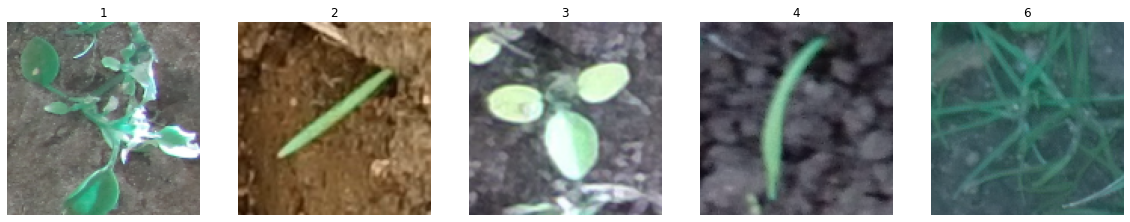

In [9]:
# Visualize five images from the dataset

labels = ['1', '2', '3', '4','6']
fig, axs = plt.subplots(1,5, figsize=(20,10))

for i in range(5):
    
    list_class = np.where(y_train==i)[0][:5]
    axs[i].imshow(Image.fromarray(x_train[i]))
    axs[i].axis("off")
    axs[i].set_title(labels[i])

## Part 1a. Transfer Learning - Classification Network (3 Marks)
For this assignment, you are asked to use the Keras implementation of VGG-16 as a starting point. 

Using the first 2 blocks of VGG-16 add extra Keras layers to create your own version of a CNN network for the classification of the images according to the number of leaves in the plant images. Note that there will be 5 classes. The last layer from VGG-16 will be block2 pool and you are allowed to add no more than five fully connected or convolutional layers to the network including the final output layer. 

- You can use as many pooling, flattening, 1 × 1 convolution layers, etc. as you wish but do not use any regularization.
- Train this simple network on the training set while monitoring convergence on the validation set.
- As input to the model use images of size no larger than 128×128.

Note, it is highly recommended to use even smaller input images to try things out. You are not expected to fine-tune the initial VGG layers.

When your classifier is working:
- Plot a loss curve for training and validation data
- Plot an accuracy curve for training and validation data
- Provide confusion matrix of your network on the training including validation and testing data sets.


In [10]:
# Write your code here

In [11]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [12]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [13]:
def plot_Mean_square_error(history):
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['val_mean_squared_error'])
    plt.title('Model mean_squared_error')
    plt.ylabel('mean_squared_error')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [14]:
# classification model
vgg_model = VGG16(weights='imagenet',include_top=False,input_shape=(128,128, 3))

In [15]:
# Show the summary of the model
print(vgg_model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [16]:
# Adding layers to the first 2 blocks of VGG-16
for layer in vgg_model.layers:
    layer.trainable = False
x = vgg_model.layers[6].output
x= Conv2D(564, kernel_size=5, activation='relu', padding='same')(x)
x= MaxPooling2D(pool_size=(2, 2))(x)
x= Conv2D(350, kernel_size=3, activation='relu', padding='same')(x)
x= MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(350, activation = "relu")(x)
x = Dense(200, activation = "relu")(x)
x = Dense(5, activation='softmax')(x)

In [17]:
vgg_model_transfer = Model(inputs=vgg_model.input, outputs=x)
vgg_model_transfer.compile(loss='sparse_categorical_crossentropy',optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.0002),metrics=['accuracy'])

history = vgg_model_transfer.fit(x_train,y_train, batch_size=128, epochs=70, verbose=1,validation_data=(x_val,y_val))

Epoch 1/70
5/5 [==============================] - 27s 6s/step - loss: 2547.1418 - accuracy: 0.2143 - val_loss: 705.9714 - val_accuracy: 0.1778
Epoch 2/70
5/5 [==============================] - 28s 6s/step - loss: 319.3707 - accuracy: 0.2079 - val_loss: 73.8703 - val_accuracy: 0.2074
Epoch 3/70
5/5 [==============================] - 29s 6s/step - loss: 61.7056 - accuracy: 0.2190 - val_loss: 21.2648 - val_accuracy: 0.2037
Epoch 4/70
5/5 [==============================] - 29s 6s/step - loss: 22.5871 - accuracy: 0.1810 - val_loss: 16.5137 - val_accuracy: 0.2037
Epoch 5/70
5/5 [==============================] - 29s 6s/step - loss: 11.3588 - accuracy: 0.2175 - val_loss: 11.0586 - val_accuracy: 0.2111
Epoch 6/70
5/5 [==============================] - 29s 6s/step - loss: 8.8333 - accuracy: 0.2444 - val_loss: 7.9591 - val_accuracy: 0.1926
Epoch 7/70
5/5 [==============================] - 28s 6s/step - loss: 6.0502 - accuracy: 0.2286 - val_loss: 5.8092 - val_accuracy: 0.2111
Epoch 8/70
5/5 [====

Epoch 60/70
5/5 [==============================] - 28s 6s/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 3.8263 - val_accuracy: 0.3000
Epoch 61/70
5/5 [==============================] - 28s 6s/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 3.8697 - val_accuracy: 0.3074
Epoch 62/70
5/5 [==============================] - 28s 6s/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 3.8702 - val_accuracy: 0.3037
Epoch 63/70
5/5 [==============================] - 28s 6s/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 3.9030 - val_accuracy: 0.3111
Epoch 64/70
5/5 [==============================] - 28s 6s/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 3.8924 - val_accuracy: 0.3037
Epoch 65/70
5/5 [==============================] - 28s 6s/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 3.9238 - val_accuracy: 0.3000
Epoch 66/70
5/5 [==============================] - 28s 6s/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 3.9436 - val_accuracy: 0.3037
Epoch 67/70
5/5 [==========

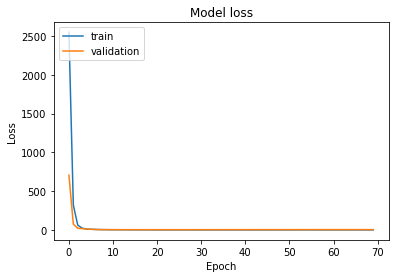

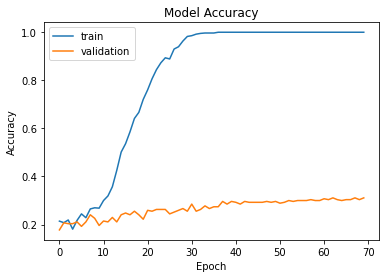

In [18]:
plot_loss(history)
plot_accuracy(history)

20/20 [==============================] - 12s 613ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       126
           2       1.00      1.00      1.00       126
           3       1.00      1.00      1.00       126
           4       1.00      1.00      1.00       126
           6       1.00      1.00      1.00       126

    accuracy                           1.00       630
   macro avg       1.00      1.00      1.00       630
weighted avg       1.00      1.00      1.00       630



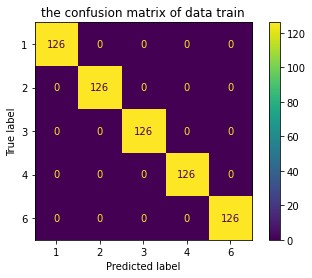

In [19]:
#confusion matrix and classification report on the training dataset

y_pred_train = vgg_model_transfer.predict(x_train)
y_predict_train_cl = y_pred_train.argmax(axis=-1)
y_predict_train_cl=label.inverse_transform(y_predict_train_cl)
y_train_cl=label.inverse_transform(y_train)
print(classification_report(y_train_cl ,y_predict_train_cl))
cm_train_cl=confusion_matrix(y_train_cl,y_predict_train_cl)
disp = ConfusionMatrixDisplay(confusion_matrix =cm_train_cl,display_labels = np.unique(y_train_cl))
disp.plot()
plt.title("the confusion matrix of data train")
plt.show()

9/9 [==============================] - 5s 580ms/step
              precision    recall  f1-score   support

           1       0.38      0.30      0.33        54
           2       0.34      0.44      0.38        54
           3       0.35      0.26      0.30        54
           4       0.22      0.24      0.23        54
           6       0.29      0.31      0.30        54

    accuracy                           0.31       270
   macro avg       0.32      0.31      0.31       270
weighted avg       0.32      0.31      0.31       270



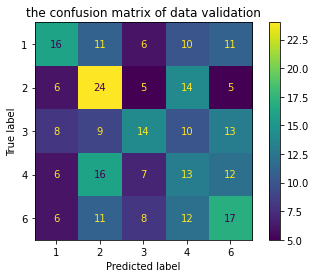

In [20]:
#confusion matrix and classification report on the validation dataset

y_pred_val = vgg_model_transfer.predict(x_val)
y_predict_val_cl = y_pred_val.argmax(axis=-1)
y_predict_val_cl=label.inverse_transform(y_predict_val_cl)
y_val_cl=label.inverse_transform(y_val)
print(classification_report(y_val_cl ,y_predict_val_cl))
cm_val_cl=confusion_matrix(y_val_cl,y_predict_val_cl)
disp = ConfusionMatrixDisplay(confusion_matrix =cm_val_cl,display_labels = np.unique(y_val_cl))
disp.plot()
plt.title("the confusion matrix of data validation")
plt.show()

4/4 [==============================] - 2s 462ms/step
              precision    recall  f1-score   support

           1       0.43      0.50      0.47        20
           2       0.26      0.30      0.28        20
           3       0.11      0.10      0.10        20
           4       0.23      0.25      0.24        20
           6       0.38      0.25      0.30        20

    accuracy                           0.28       100
   macro avg       0.28      0.28      0.28       100
weighted avg       0.28      0.28      0.28       100



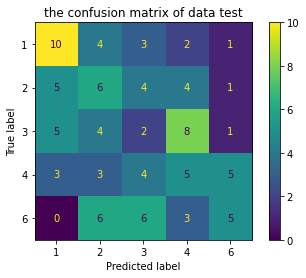

In [21]:
#confusion matrix and classification report on the testing dataset

y_pred_test = vgg_model_transfer.predict(x_test)
y_predict_test_cl = y_pred_test.argmax(axis=-1)
y_predict_test_cl=label.inverse_transform(y_predict_test_cl)
print(classification_report(y_test ,y_predict_test_cl))
cm_test_cl=confusion_matrix(y_test,y_predict_test_cl)
disp = ConfusionMatrixDisplay(confusion_matrix =cm_test_cl,display_labels = np.unique(y_test))
disp.plot()
plt.title("the confusion matrix of data test")
plt.show()

## Part 1b. Transfer Learning - Regression Reformulation (3 Marks)

### Step 1 (2)
Repeat the steps of Part 1a. but reformulate as a regression problem, i.e., your network needs to output a single float value ranging between 0 to 6 corresponding to the number of leaves. Again, you are not expected to fine-tune the initial VGG layers.

- Plot a loss curve for training and validation data
- Plot an accuracy curve for training and validation data
- Provide confusion matrix of your network on the training including validation and testing data sets.


In [22]:
#Write your code here

In [23]:
vgg_Regression = VGG16(weights='imagenet',include_top=False,input_shape=(128,128, 3),classifier_activation="linear")
print(vgg_Regression.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [24]:
# Adding layers to the first 2 blocks of VGG-16
for layer in vgg_Regression.layers:
    layer.trainable = False

x = vgg_Regression.layers[6].output
x= Conv2D(128, (2,2),activation='tanh')(x)
x= MaxPooling2D(pool_size=(2, 2))(x)
x= Conv2D(128,(2,2), activation='relu')(x)
x= MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(1)(x)

In [25]:
vgg_model_transfer_reg = Model(inputs=vgg_Regression.input, outputs=x)
vgg_model_transfer_reg.compile(loss='mean_squared_error',optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.0001),metrics=['mean_squared_error','accuracy'])

history_reg = vgg_model_transfer_reg.fit(x_train,y_train.astype('float'), batch_size=128, epochs=70, verbose=1,validation_data=(x_val,y_val.astype('float')))

Epoch 1/70
5/5 [==============================] - 10s 2s/step - loss: 3.4156 - mean_squared_error: 3.4156 - accuracy: 0.2079 - val_loss: 3.3229 - val_mean_squared_error: 3.3229 - val_accuracy: 0.2000
Epoch 2/70
5/5 [==============================] - 10s 2s/step - loss: 2.6025 - mean_squared_error: 2.6025 - accuracy: 0.2000 - val_loss: 2.4656 - val_mean_squared_error: 2.4656 - val_accuracy: 0.2037
Epoch 3/70
5/5 [==============================] - 10s 2s/step - loss: 2.1447 - mean_squared_error: 2.1447 - accuracy: 0.2016 - val_loss: 2.3898 - val_mean_squared_error: 2.3898 - val_accuracy: 0.2074
Epoch 4/70
5/5 [==============================] - 10s 2s/step - loss: 1.9091 - mean_squared_error: 1.9091 - accuracy: 0.2032 - val_loss: 2.1734 - val_mean_squared_error: 2.1734 - val_accuracy: 0.2000
Epoch 5/70
5/5 [==============================] - 10s 2s/step - loss: 1.7345 - mean_squared_error: 1.7345 - accuracy: 0.2032 - val_loss: 2.0759 - val_mean_squared_error: 2.0759 - val_accuracy: 0.2000


Epoch 42/70
5/5 [==============================] - 10s 2s/step - loss: 0.0017 - mean_squared_error: 0.0017 - accuracy: 0.4000 - val_loss: 1.5455 - val_mean_squared_error: 1.5455 - val_accuracy: 0.2259
Epoch 43/70
5/5 [==============================] - 10s 2s/step - loss: 0.0012 - mean_squared_error: 0.0012 - accuracy: 0.4000 - val_loss: 1.5440 - val_mean_squared_error: 1.5440 - val_accuracy: 0.2259
Epoch 44/70
5/5 [==============================] - 10s 2s/step - loss: 8.3335e-04 - mean_squared_error: 8.3335e-04 - accuracy: 0.4000 - val_loss: 1.5457 - val_mean_squared_error: 1.5457 - val_accuracy: 0.2259
Epoch 45/70
5/5 [==============================] - 10s 2s/step - loss: 5.7688e-04 - mean_squared_error: 5.7688e-04 - accuracy: 0.4000 - val_loss: 1.5443 - val_mean_squared_error: 1.5443 - val_accuracy: 0.2259
Epoch 46/70
5/5 [==============================] - 10s 2s/step - loss: 4.2704e-04 - mean_squared_error: 4.2704e-04 - accuracy: 0.4000 - val_loss: 1.5429 - val_mean_squared_error: 1

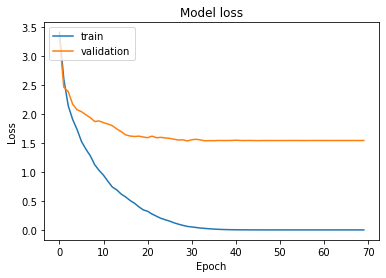

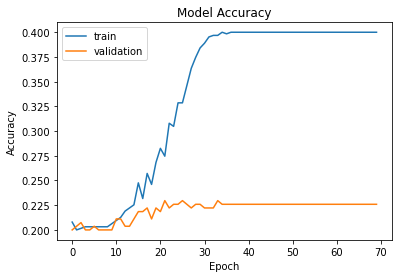

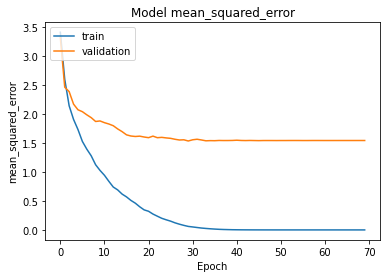

In [26]:
plot_loss(history_reg)
plot_accuracy(history_reg)
plot_Mean_square_error(history_reg)

20/20 [==============================] - 7s 323ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       126
           2       1.00      1.00      1.00       126
           3       1.00      1.00      1.00       126
           4       1.00      1.00      1.00       126
           6       1.00      1.00      1.00       126

    accuracy                           1.00       630
   macro avg       1.00      1.00      1.00       630
weighted avg       1.00      1.00      1.00       630



C:\Users\mm\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


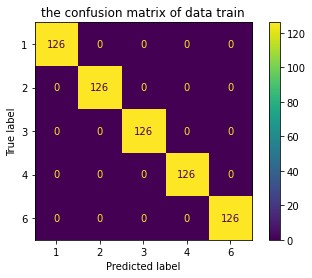

In [27]:
y_pred_train_reg = vgg_model_transfer_reg.predict(x_train)
y_predict_train_reg = np.round(y_pred_train_reg).astype('int')
y_predict_train_reg=label.inverse_transform(y_predict_train_reg)
y_train_reg = label.inverse_transform(y_train)
print(classification_report(y_train_reg ,y_predict_train_reg))
cm_train_reg=confusion_matrix(y_predict_train_reg,y_train_reg)
disp = ConfusionMatrixDisplay(confusion_matrix =cm_train_reg,display_labels = np.unique(y_train_reg))
disp.plot()
plt.title("the confusion matrix of data train")
plt.show()

9/9 [==============================] - 3s 278ms/step
              precision    recall  f1-score   support

           1       0.78      0.13      0.22        54
           2       0.32      0.44      0.37        54
           3       0.26      0.48      0.34        54
           4       0.29      0.39      0.33        54
           6       0.69      0.17      0.27        54

    accuracy                           0.32       270
   macro avg       0.47      0.32      0.31       270
weighted avg       0.47      0.32      0.31       270



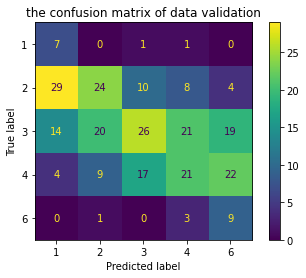

In [75]:
#confusion matrix and classification report on the validation dataset

y_pred_val_reg = vgg_model_transfer_reg.predict(x_val)
y_predict_val_reg = np.round(y_pred_val_reg).astype('int')
y_predict_val_reg[y_predict_val_reg<1] =0
y_predict_val_reg[y_predict_val_reg>4] = 4
y_predict_val_reg = np.array([3 if i > 3 and i < 4 else i for i in y_predict_val_reg.flatten()])
y_predict_val_reg=label.inverse_transform(y_predict_val_reg)
y_val_reg = label.inverse_transform(y_val)
print(classification_report(y_val_reg ,y_predict_val_reg))
cm_val_reg=confusion_matrix(y_predict_val_reg,y_val_reg)
disp = ConfusionMatrixDisplay(confusion_matrix =cm_val_reg,display_labels = np.unique(y_val_reg))
disp.plot()
plt.title("the confusion matrix of data validation")
plt.show()

4/4 [==============================] - 1s 217ms/step
              precision    recall  f1-score   support

           1       0.50      0.15      0.23        20
           2       0.25      0.30      0.27        20
           3       0.20      0.45      0.28        20
           4       0.33      0.35      0.34        20
           6       0.50      0.10      0.17        20

    accuracy                           0.27       100
   macro avg       0.36      0.27      0.26       100
weighted avg       0.36      0.27      0.26       100



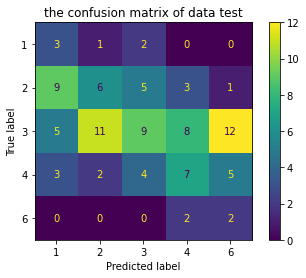

In [34]:
#confusion matrix and classification report on the validation dataset

y_pred_test_reg = vgg_model_transfer_reg.predict(x_test)
y_predict_test_reg = np.round(y_pred_test_reg).astype('int')
y_predict_test_reg=label.inverse_transform(y_predict_test_reg)
# y_test_reg = label.inverse_transform(y_test)
print(classification_report(y_test ,y_predict_test_reg))
cm_test_reg=confusion_matrix(y_predict_test_reg,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix =cm_test_reg,display_labels = np.unique(y_test))
disp.plot()
plt.title("the confusion matrix of data test")
plt.show()

### Step 2 (1)
The size of the training data is quite small. Discuss based on your learning curves if overfitting is occurring with the models from Parts 1a and 1b.

Write your discussion here.

Part 1a (transfer learning classification network):-
- After using the VGG-16 model with input_shape=(128X128),some parameters such as, include_top = false, which means that I'm not interested in the last layer of the model;weights="imagenet" means to have the pre-trained weights for the imagenet dataset. I freezed the layers by using(layer.trainable = False) which moves all the layer's weights from trainable to non-trainable
- I used the first 2 blocks of VGG-16 and added some layers to create a CNN network for the classification of the images,including the final output layer which includes 5 classes.

- As shown in the graph loss,the overall loss in the train and the validation curves decreases.

- As shown in the graph accuracy,the overall accuracy in the training and validation increases.The difference is very big between the train curve and the validation curve,which means there is an overfitting.

- As shown in the training data,there is an overfitting as the accuracy started from 21% up to 100% by using 70 epochs and 0.0002 learning rate,128 batch size.The model's final accuracy on the data training  according to the classification report is 100% and the confusion matrix refers that the data training is very good , it can correctly classify every image in the training data. 

- As shown in the validation data,the accuracy started from 17 up to 31% but the model's final accuracy is 31% according to the classification report,which means that the model cannot perform well on the validation data.

- In the testing data, the model scored 28% accuracy and couldn't recognize most of the actual classes according to the confusion Matrix shown above, the model only recognized 28% right classes from 100 classes.

Part 1b (Transfer Learning Regression):-
- After using the VGG-16 model with input_shape=(128X128),some parameters such as, include_top = false, which means that I'm not interested in the last layer of the model;weights="imagenet" means to have the pre-trained weights for the imagenet dataset. I freezed the layers by using(layer.trainable = False) which moves all the layer's weights from trainable to non-trainable, classifier_activation="linear"

- I used the first 2 blocks of VGG-16 and added layers to create a CNN network for the regression of the images,including the final output layer which includes 1 class.


- As shown in the training data,there is overfitting. The accuracy started from 20% up to 40% and the mean_squared_error started from 4 and decreased to 0 using 70 epochs, 0.0002 learning rate and 128 batch size.The model's final accuracy on the data training according to the classification report is 100% and the confusion matrix refers that the data training is very good , it can correctly classify every image in the training data.

- As shown in the validation data,the accuracy ranges between 20% to 22%, but the model's final accuracy is 32% according to the classification report,which means that the model cannot perform well on the validation data.

- In the testing data, the model scored 27% accuracy and couldn't recognize most of the actual classes according to the confusion Matrix shown above, the model only recognized 27% right classes from 100 classes.

- As shown in the graph loss,the overall loss in the train and the validation curves decreases.

- As shown in the graph accuracy,the overall accuracy in the training and validation increases. The accuracy in the train curve increases and the validation curve doesn't change much,which means there is overfitting.

- As shown in the graph mean_squared_error,the overall mean_squared_error in the train and the validation curves decreases.

## Part 2. Improve your Model (4 Marks)

Regularization and data augmentation are common strategies to deal with small datasets.

### Step 1 (1.5)
Incorporate Batch Normalization and Dropout into your design the superior network trained in Part 1. You are not expected to fine-tune the initial VGG layers. Again you will provide the following:
- A loss curve for training and validation data
- An accuracy curve for training and validation data
- A confusion matrix of your network on the training including validation and testing data sets.

In [35]:
vgg_model_regualization = VGG16(weights='imagenet',include_top=False,input_shape=(128, 128, 3))
print(vgg_model_regualization.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [36]:
# Adding layers to the first 2 blocks of VGG-16
for layer in vgg_model_regualization.layers:
    layer.trainable = False

x = vgg_model_regualization.layers[6].output
x= Conv2D(128, (2,2),activation='relu')(x)
x= MaxPooling2D(pool_size=(2, 2))(x)
x= Conv2D(128,(2,2), activation='relu')(x)
x= MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.5)(x)
x=BatchNormalization()(x)
x = Flatten()(x)

x = Dense(5, activation='softmax')(x)

In [37]:
# y_val= y_val.astype("int")

In [38]:
vgg_transfer_regualization = Model(inputs=vgg_model_regualization.input, outputs=x)
vgg_transfer_regualization.compile(loss='sparse_categorical_crossentropy',optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.0002),metrics=['accuracy'])

history_regularization = vgg_transfer_regualization.fit(x_train,y_train, batch_size=128, epochs=70, verbose=1,validation_data=(x_val,y_val))

Epoch 1/70
5/5 [==============================] - 10s 2s/step - loss: 2.1888 - accuracy: 0.2206 - val_loss: 3.9720 - val_accuracy: 0.1852
Epoch 2/70
5/5 [==============================] - 9s 2s/step - loss: 1.9348 - accuracy: 0.2825 - val_loss: 3.4681 - val_accuracy: 0.2111
Epoch 3/70
5/5 [==============================] - 9s 2s/step - loss: 1.7553 - accuracy: 0.3238 - val_loss: 3.2537 - val_accuracy: 0.2481
Epoch 4/70
5/5 [==============================] - 9s 2s/step - loss: 1.6133 - accuracy: 0.3571 - val_loss: 2.8833 - val_accuracy: 0.2667
Epoch 5/70
5/5 [==============================] - 9s 2s/step - loss: 1.4530 - accuracy: 0.4333 - val_loss: 2.4300 - val_accuracy: 0.2815
Epoch 6/70
5/5 [==============================] - 10s 2s/step - loss: 1.3645 - accuracy: 0.4381 - val_loss: 2.2025 - val_accuracy: 0.2963
Epoch 7/70
5/5 [==============================] - 10s 2s/step - loss: 1.2493 - accuracy: 0.5079 - val_loss: 2.0829 - val_accuracy: 0.3259
Epoch 8/70
5/5 [======================

5/5 [==============================] - 10s 2s/step - loss: 0.0698 - accuracy: 0.9968 - val_loss: 1.3497 - val_accuracy: 0.5222
Epoch 61/70
5/5 [==============================] - 10s 2s/step - loss: 0.0563 - accuracy: 1.0000 - val_loss: 1.3576 - val_accuracy: 0.5111
Epoch 62/70
5/5 [==============================] - 10s 2s/step - loss: 0.0593 - accuracy: 0.9984 - val_loss: 1.3656 - val_accuracy: 0.5185
Epoch 63/70
5/5 [==============================] - 10s 2s/step - loss: 0.0557 - accuracy: 1.0000 - val_loss: 1.3657 - val_accuracy: 0.5222
Epoch 64/70
5/5 [==============================] - 10s 2s/step - loss: 0.0532 - accuracy: 0.9984 - val_loss: 1.3598 - val_accuracy: 0.5259
Epoch 65/70
5/5 [==============================] - 10s 2s/step - loss: 0.0525 - accuracy: 1.0000 - val_loss: 1.3511 - val_accuracy: 0.5296
Epoch 66/70
5/5 [==============================] - 10s 2s/step - loss: 0.0523 - accuracy: 0.9984 - val_loss: 1.3585 - val_accuracy: 0.5148
Epoch 67/70
5/5 [======================

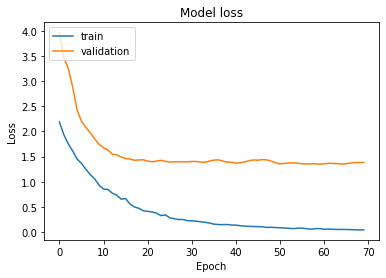

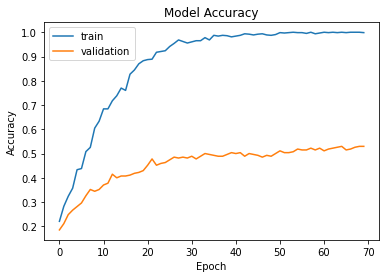

In [39]:
plot_loss(history_regularization)
plot_accuracy(history_regularization)

20/20 [==============================] - 7s 322ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       126
           2       1.00      1.00      1.00       126
           3       1.00      1.00      1.00       126
           4       1.00      1.00      1.00       126
           6       1.00      1.00      1.00       126

    accuracy                           1.00       630
   macro avg       1.00      1.00      1.00       630
weighted avg       1.00      1.00      1.00       630



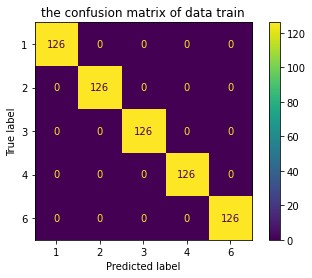

In [40]:
#confusion matrix and classification report on the training dataset

y_pre_tr_regularization = vgg_transfer_regualization.predict(x_train)
y_predict_train_regularization = y_pre_tr_regularization.argmax(axis=1)
y_predict_train_regularization=label.inverse_transform(y_predict_train_regularization)
y_train_regularization=label.inverse_transform(y_train)
print(classification_report(y_train_regularization.astype('int') ,y_predict_train_regularization.astype('int')))
cm_train_regularization=confusion_matrix(y_predict_train_regularization,y_train_regularization)
disp = ConfusionMatrixDisplay(confusion_matrix =cm_train_regularization,display_labels = np.unique(y_train_regularization))
disp.plot()
plt.title("the confusion matrix of data train")
plt.show()

9/9 [==============================] - 3s 305ms/step
              precision    recall  f1-score   support

           1       0.64      0.81      0.72        54
           2       0.56      0.70      0.62        54
           3       0.32      0.11      0.16        54
           4       0.65      0.24      0.35        54
           6       0.45      0.78      0.57        54

    accuracy                           0.53       270
   macro avg       0.52      0.53      0.48       270
weighted avg       0.52      0.53      0.48       270



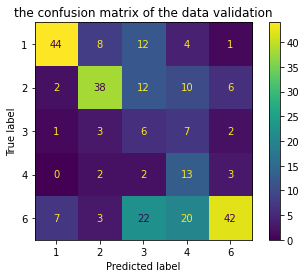

In [41]:
#confusion matrix and classification report on the validation dataset

y_pre_val_regularization = vgg_transfer_regualization.predict(x_val)
y_predict_val_regularization = y_pre_val_regularization.argmax(axis=-1)
y_predict_val_regularization=label.inverse_transform(y_predict_val_regularization)
y_val_regularization=label.inverse_transform(y_val)
print(classification_report(y_val_regularization ,y_predict_val_regularization))
cm_val_regularization=confusion_matrix(y_predict_val_regularization,y_val_regularization)
disp = ConfusionMatrixDisplay(confusion_matrix =cm_val_regularization,display_labels = np.unique(y_val_regularization))
disp.plot()
plt.title("the confusion matrix of the data validation")
plt.show()

4/4 [==============================] - 1s 227ms/step
              precision    recall  f1-score   support

           1       0.50      0.65      0.57        20
           2       0.42      0.40      0.41        20
           3       0.15      0.10      0.12        20
           4       0.33      0.15      0.21        20
           6       0.42      0.70      0.53        20

    accuracy                           0.40       100
   macro avg       0.37      0.40      0.37       100
weighted avg       0.37      0.40      0.37       100



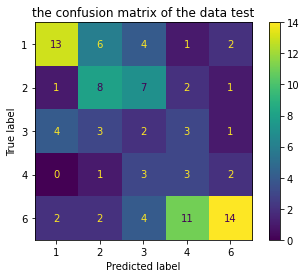

In [42]:
#confusion matrix and classification report on the testing dataset

y_pre_test_regularization = vgg_transfer_regualization.predict(x_test)
y_predict_test_regularization = y_pre_test_regularization.argmax(axis=-1)
y_predict_test_regularization=label.inverse_transform(y_predict_test_regularization)
print(classification_report(y_test ,y_predict_test_regularization))
cm_test_regularization=confusion_matrix(y_predict_test_regularization,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix =cm_test_regularization,display_labels = np.unique(y_test))
disp.plot()
plt.title("the confusion matrix of the data test")
plt.show()


### Step 2 (1.5)
Train the same model from Step 1, now using data augmentation. Again, please provide the same output metrics as in Step 1.


In [77]:
datagenerator = ImageDataGenerator(
        rotation_range=30,     # rotation
        width_shift_range=0.2,  # horizontal shift
        height_shift_range=0.2, # vertical shift
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,   # horizontal flip
        fill_mode='nearest',
        brightness_range=[0.2,1.2])

In [78]:
imgs_one = r'C:\Users\mm\training\1'
one = os.listdir((imgs_one))
imgs_1=[]
for i in one:
    path = os.path.join(imgs_one, i)
    imgs_1.append(cv2.imread(path))
    
imgs_resized_one=[]
for i in imgs_1:
    imgs_resized_one.append(cv2.resize(i,(128,128)))
    
imgs_resized_one=np.array(imgs_resized_one)
save_here = r"C:\Users\mm\training\new 1"
datagenerator.fit(imgs_resized_one)
Aug=datagenerator.flow(imgs_resized_one,                   
        save_to_dir=save_here,     
         save_prefix='aug',batch_size=64,        
        save_format='png')
for i in range(5):
    Aug.next()

In [79]:
imgs_Two = r'C:\Users\mm\training\2'
Two = os.listdir((imgs_Two))
imgs_2=[]
for i in Two:
    path = os.path.join(imgs_Two, i)
    imgs_2.append(cv2.imread(path))
    
imgs_resized_Two=[]
for i in imgs_2:
    imgs_resized_Two.append(cv2.resize(i,(128,128)))
    
imgs_resized_Two=np.array(imgs_resized_Two)
save_here = r"C:\Users\mm\training\new 2"
datagenerator.fit(imgs_resized_Two)
Aug=datagenerator.flow(imgs_resized_Two,                   
        save_to_dir=save_here,     
         save_prefix='aug',batch_size=64,        
        save_format='png')
for i in range(5):
    Aug.next()

In [80]:
imgs_Three = r'C:\Users\mm\training\3'
Three = os.listdir((imgs_Three))
imgs_3=[]
for i in Three:
    path = os.path.join(imgs_Three, i)
    imgs_3.append(cv2.imread(path))
    
imgs_resized_Three=[]
for i in imgs_3:
    imgs_resized_Three.append(cv2.resize(i,(128,128)))

imgs_resized_Three=np.array(imgs_resized_Three)
save_here = r"C:\Users\mm\training\new 3"
datagenerator.fit(imgs_resized_Three)
Aug=datagenerator.flow(imgs_resized_Three,                   
        save_to_dir=save_here,     
         save_prefix='aug',batch_size=64,        
        save_format='png')
for i in range(5):
    Aug.next()

In [81]:
imgs_Four = r'C:\Users\mm\training\4'
Four = os.listdir((imgs_Four))
imgs_4=[]
for i in Four:
    path = os.path.join(imgs_Four, i)
    imgs_4.append(cv2.imread(path))
    
imgs_resized_Four=[]
for i in imgs_4:
    imgs_resized_Four.append(cv2.resize(i,(128,128)))   
    
imgs_resized_Four=np.array(imgs_resized_Four)
save_here = r"C:\Users\mm\training\new 4"
datagenerator.fit(imgs_resized_Four)
Aug=datagenerator.flow(imgs_resized_Four,                   
        save_to_dir=save_here,     
         save_prefix='aug',batch_size=64,        
        save_format='png')
for i in range(5):
    Aug.next()

In [82]:
imgs_Six = r'C:\Users\mm\training\6'
Six = os.listdir((imgs_Six))
imgs_6=[]
for i in Six:
    path = os.path.join(imgs_Six, i)
    imgs_6.append(cv2.imread(path))
    
imgs_resized_Six=[]
for i in imgs_6:
    imgs_resized_Six.append(cv2.resize(i,(128,128)))
    
imgs_resized_Six=np.array(imgs_resized_Six)
save_here = r"C:\Users\mm\training\new 6"
datagenerator.fit(imgs_resized_Six)
Aug=datagenerator.flow(imgs_resized_Six,                   
        save_to_dir=save_here,     
         save_prefix='aug',batch_size=64,        
        save_format='png')
for i in range(5):
    Aug.next()

In [88]:
# Read dataset
Train=os.listdir("augmntation_data")
Test=os.listdir("testing")

path_Train="augmntation_data/"
path_Test="testing/"

image_size=128
X_train,X_test=[],[]
Y_train,Y_test=[],[]

for i in Train:
    Tr_path=path_Train+str(i)
    file=[i for i in os.listdir(Tr_path)]
    for g in file:
        img = cv2.imread(Tr_path+'/'+g)
        imge=cv2.resize(img,(image_size,image_size))
        X_train.append(imge)
        Y_train.append(i)  

In [89]:
for i in Test:
    Tes_path=path_Test+str(i)
    file=[i for i in os.listdir(Tes_path)]
    for g in file:
        img = cv2.imread(Tes_path+'/'+g)
        imge=cv2.resize(img,(image_size,image_size))
        X_test.append(imge)
        Y_test.append(i) 

In [90]:
# Converting data to numpy array 
X_train = np.array(X_train)
X_test =np.array(X_test)


In [91]:
## splitting the data into 70% train , 30% test
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train,test_size=0.3, random_state=42, stratify=Y_train)

In [92]:
#Label encoder to y
label = LabelEncoder()
Y_train= label.fit_transform(Y_train)
Y_val = label.transform(Y_val)

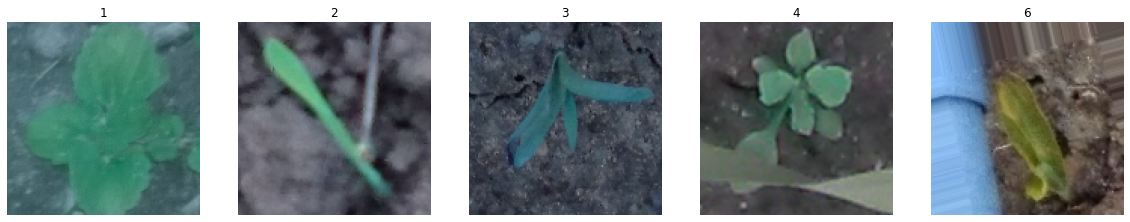

In [93]:
# Visualize five images from the dataset

labels = ['1', '2', '3', '4','6']
fig, axs = plt.subplots(1,5, figsize=(20,10))

for i in range(5):
    
    list_class = np.where(Y_train==i)[0][:5]
    axs[i].imshow(Image.fromarray(X_train[i]))
    axs[i].axis("off")
    axs[i].set_title(labels[i])

In [94]:
vgg_model_augmentation = VGG16(weights='imagenet',include_top=False,input_shape=(128, 128, 3))
print(vgg_model_augmentation.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [95]:
# Adding layers to the first 2 blocks of VGG-16
for layer in vgg_model_augmentation.layers:
    layer.trainable = False

x = vgg_model_augmentation.layers[6].output
x= Conv2D(128, (2,2),activation='relu')(x)
x= MaxPooling2D(pool_size=(2, 2))(x)
x= Conv2D(128,(2,2), activation='relu')(x)
x= MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.5)(x)
x=BatchNormalization()(x)
x = Flatten()(x)

x = Dense(5, activation='softmax')(x)

In [96]:
vgg_model_transfer_aug = Model(inputs=vgg_model_augmentation.input, outputs=x)
vgg_model_transfer_aug.compile(loss='sparse_categorical_crossentropy',optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.0002),metrics=['accuracy'])

history_augment = vgg_model_transfer_aug.fit(X_train,Y_train, batch_size=128, epochs=70, verbose=1,validation_data=(X_val,Y_val))

Epoch 1/70
14/14 [==============================] - 26s 2s/step - loss: 2.1631 - accuracy: 0.2196 - val_loss: 3.2974 - val_accuracy: 0.2459
Epoch 2/70
14/14 [==============================] - 27s 2s/step - loss: 1.8741 - accuracy: 0.3009 - val_loss: 2.6076 - val_accuracy: 0.2404
Epoch 3/70
14/14 [==============================] - 27s 2s/step - loss: 1.7001 - accuracy: 0.3519 - val_loss: 1.8234 - val_accuracy: 0.3019
Epoch 4/70
14/14 [==============================] - 27s 2s/step - loss: 1.4987 - accuracy: 0.4198 - val_loss: 1.6459 - val_accuracy: 0.3374
Epoch 5/70
14/14 [==============================] - 27s 2s/step - loss: 1.3880 - accuracy: 0.4672 - val_loss: 1.5924 - val_accuracy: 0.3852
Epoch 6/70
14/14 [==============================] - 27s 2s/step - loss: 1.2902 - accuracy: 0.4982 - val_loss: 1.5872 - val_accuracy: 0.3675
Epoch 7/70
14/14 [==============================] - 28s 2s/step - loss: 1.2012 - accuracy: 0.5369 - val_loss: 1.4693 - val_accuracy: 0.3948
Epoch 8/70
14/14 [==

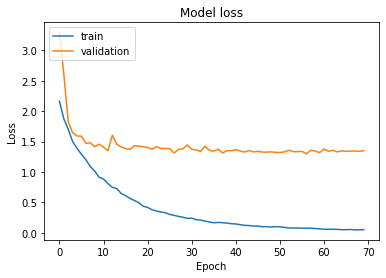

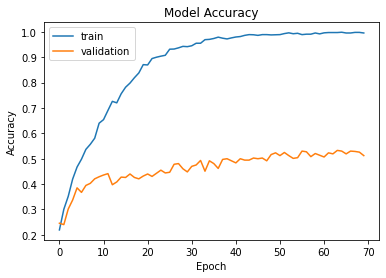

In [102]:
plot_loss(history_augment)
plot_accuracy(history_augment)

In [125]:
Y_train

array([4, 0, 2, ..., 4, 2, 0], dtype=int64)

54/54 [==============================] - 16s 298ms/step
              precision    recall  f1-score   support

       new 1       1.00      1.00      1.00       341
       new 2       1.00      1.00      1.00       342
       new 3       1.00      1.00      1.00       342
       new 4       1.00      1.00      1.00       341
       new 6       1.00      1.00      1.00       342

    accuracy                           1.00      1708
   macro avg       1.00      1.00      1.00      1708
weighted avg       1.00      1.00      1.00      1708



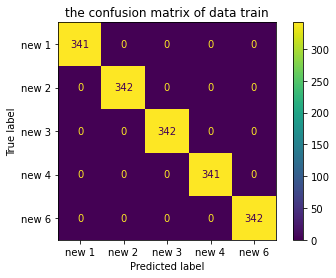

In [101]:
#confusion matrix and classification report on the training dataset
Y_pre_train_aug = vgg_model_transfer_aug.predict(X_train)
Y_predict_train_augmentation = Y_pre_train_aug.argmax(axis=-1)
Y_predict_train_augmentation=label.inverse_transform(Y_predict_train_augmentation)
Y_train_augmentation=label.inverse_transform(Y_train)
print(classification_report(Y_train_augmentation ,Y_predict_train_augmentation))

cm_train_augmentation=confusion_matrix(Y_predict_train_augmentation,Y_train_augmentation)
disp = ConfusionMatrixDisplay(confusion_matrix =cm_train_augmentation,display_labels = np.unique(Y_train_augmentation))
disp.plot()
plt.title("the confusion matrix of data train")
plt.show()

23/23 [==============================] - 7s 301ms/step
              precision    recall  f1-score   support

       new 1       0.57      0.78      0.66       147
       new 2       0.55      0.53      0.54       146
       new 3       0.39      0.33      0.36       146
       new 4       0.44      0.34      0.38       147
       new 6       0.56      0.58      0.57       146

    accuracy                           0.51       732
   macro avg       0.50      0.51      0.50       732
weighted avg       0.50      0.51      0.50       732



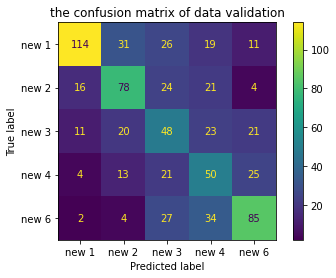

In [103]:
#confusion matrix and classification report on the validation dataset
Y_pre_val_aug = vgg_model_transfer_aug.predict(X_val)
Y_predict_val_augmentation = Y_pre_val_aug.argmax(axis=-1)
Y_predict_val_augmentation=label.inverse_transform(Y_predict_val_augmentation)
Y_val_augmentation=label.inverse_transform(Y_val)
print(classification_report(Y_val_augmentation ,Y_predict_val_augmentation))

cm_val_augmentation=confusion_matrix(Y_predict_val_augmentation,Y_val_augmentation)
disp = ConfusionMatrixDisplay(confusion_matrix =cm_val_augmentation,display_labels = np.unique(Y_val_augmentation))
disp.plot()
plt.title("the confusion matrix of data validation")
plt.show()

4/4 [==============================] - 1s 214ms/step
              precision    recall  f1-score   support

           1       0.59      0.65      0.62        20
           2       0.50      0.40      0.44        20
           3       0.22      0.30      0.26        20
           4       0.42      0.25      0.31        20
           6       0.43      0.50      0.47        20

    accuracy                           0.42       100
   macro avg       0.43      0.42      0.42       100
weighted avg       0.43      0.42      0.42       100



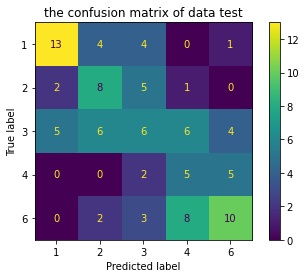

In [139]:
Y_pre_test_augm = vgg_model_transfer_aug.predict(X_test)
Y_predict_test_augmentation = Y_pre_test_augm.argmax(axis=-1)
Y_predict_test_augmentation=label.inverse_transform(Y_predict_test_augmentation)
Y_predict_test_augmentation = [x.replace("new ", "") for x in Y_predict_test_augmentation]
print(classification_report(Y_test ,Y_predict_test_augmentation))
cm_test_augmentation=confusion_matrix(Y_predict_test_augmentation,Y_test)
disp = ConfusionMatrixDisplay(confusion_matrix =cm_test_augmentation,display_labels = np.unique(Y_test))
disp.plot()
plt.title("the confusion matrix of data test")
plt.show()

### Step 3 (1)
Discuss based on your learning curves and final metrics in Step 2, how large a improvement can be observed from regularization and data augmentation.

Write your discussion here.

Step 1(Regularization):-
- By using dropout and batch normalization layers in the VGG-16 model and the final output layer includes 5 classes,the accuracy started from 22% up to 99% by using 70 epochs and 0.0002 learning rate and 128 batch size.The model's final accuracy of the data training according to the classification report is 100% and the confusion matrix refers to the fact that the data training is very good , it can correctly classify every image in the training data,but there is an small inhancement to the model than before after adding the dropout and the batch normalization layers to the model as the loss is 0 which means the train model predicts the classes correctly.

-  As shown in the validation data,the accuracy started from 18% up to 52%, but the model's final accuracy is 53% according to the classification report,which means that the model cannot perform well on the validation data when entering new data into the model. It couldn't predict well as it predicted 49% of the data correctly ,but it got better accuracy than before.


- On the testing data, the model scored 40% and couldn't recognize most of the actual classes according to the confusion Matrix shown above. The model only recognized 40% of the right classes from 100 classes.The accuracy of the test model increased more than before as it was 28%.

- As shown in the graph loss,the overall loss in the train and the validation curves started from 2 and decreased to 0 in the training loss and from 3 to 1 in the validation loss.


- As shown in the graph accuracy,the overall accuracy in the training and validation increases .The difference between the train curve and the validation curve is big,which means there is an overfitting.
 

Step 2 (Data Augmentation):-
- By using dropout and batch normalization layers in the model and applying augmentation to the dataset which increased the number of the data,there is also an overfitting in the training data. The accuracy started from 21% up to 99% by using 70 epochs and 0.0002 learning rate and 128 batch size.The model's final accuracy in the data training according to the classification report is 100% and the confusion matrix refers that the model in the data training predicts well,which means it classifieed correctly every image in the training data,but there is an inhancement in the model than before after applying data augmentation to the model as the loss is 0 which means the train model predicts all the classes correctly.

- As shown in the validation data,the accuracy started from 22% up to 51%, and the model's final accuracy is 51% according to the classification report,which means that the model cannot perform well on the validation data when entering new data into the model. It couldn't predict well as it predicted only 51% of the data correctly ,but it got better accuracy than before.

- On the testing data, the model scored 42% and couldn't recognize most of the actual classes according to the confusion Matrix shown above. The model only recognized 42% of the right classes from 100 classes.The accuracy of the test model has been increased than before in the regularization.

- As shown in the graph loss,the overall loss in the train and the validation curves started from 2 and decreased to 0 in the training loss and from 3 to 1 in the validation loss.

- As shown in the graph accuracy,the overall accuracy in the training and validation increases.The difference between the train curve and the validation curve is big,which means there is an overfitting but it decreased than before in the classification,so the data augmentation and regularization couldn't solve the overfitting problem, but the model improved slightly from the first and it was noticable in the validation and testing,so if we increased the number of layers and images,it may solve the problem of overfitting.   
 

## References
[1] N. Teimouri, M. Dyrmann, P. R. Nielsen, S. K. Mathiassen, G. J. Somerville, and R. N. Jørgensen, “Weed growth stage estimator using deep convolutional neural networks,” Sensors, vol. 18, no. 5, 2018.